In [ ]:
!pip install 'plenopticam>=0.7.0'

     |████████████████████████████████| 399kB 8.7MB/s 
     |████████████████████████████████| 3.6MB 15.3MB/s 
     |████████████████████████████████| 1.8MB 40.6MB/s 
     |████████████████████████████████| 2.1MB 25.0MB/s 


In [1]:
import sys
import matplotlib.pyplot as plt
import matplotlib as mpl

try:
	import plenopticam as pcam
except ImportError:
	print('run-> python3 -m pip install plenopticam>=0.7.0')

def lf_decode_sans_save(lfp_path, cal_path, full_sai = True, central_view_extract_dim = 3):
	#Configuration
	cfg = pcam.cfg.PlenopticamConfig()
	cfg.default_values()
	cfg.params[cfg.lfp_path] = lfp_path
	cfg.params[cfg.cal_path] = cal_path
	cfg.params[cfg.opt_cali] = True
	cfg.params[cfg.ptc_leng] = 13
	cfg.params[cfg.cal_meth] = pcam.cfg.constants.CALI_METH[3]
	cfg.params[cfg.opt_cont]=False
	cfg.params[cfg.opt_colo]=False
	cfg.params[cfg.opt_awb_]=False
	cfg.params[cfg.opt_sat_]=False
	sta = pcam.misc.PlenopticamStatus()

	#reading raw LF
	reader = pcam.lfp_reader.LfpReader(cfg, sta)
	reader.main()
	lfp_img = reader.lfp_img

	#finding appropriate white image in the calibration data
	cal_finder = pcam.lfp_calibrator.CaliFinder(cfg, sta)
	ret = cal_finder.main()
	wht_img = cal_finder.wht_bay

	#Micro Image Calibration
	cal_obj = pcam.lfp_calibrator.LfpCalibrator(wht_img, cfg, sta)
	ret = cal_obj.main()
	cfg = cal_obj.cfg

	#Micro Image Alignment
	ret = cfg.load_cal_data()
	aligner = pcam.lfp_aligner.LfpAligner(lfp_img, cfg, sta, wht_img)
	ret = aligner.main()
	lfp_img_align = aligner.lfp_img

	#Extracting Sub Aperture Images
	extractor = pcam.lfp_extractor.LfpExtractor(lfp_img_align, cfg, sta)
	ret = extractor.main()
	vp_img_arr = extractor.vp_img_arr

	view_obj = pcam.lfp_extractor.LfpViewpoints(vp_img_arr=vp_img_arr)
	vp_view = view_obj.central_view

	#Extracting all sub aperture views and displaying them
	view_obj = pcam.lfp_extractor.LfpViewpoints(vp_img_arr=vp_img_arr)
	vp_stack = view_obj.views_stacked_img
	vp_stack_out = vp_stack/vp_stack.max()

	if full_sai == True:
		return vp_stack_out


	







 Progress: Finished 


 Finished download of illum_test_data.zip
Extracted file caldata-B5144402350.tar
Extracted file gradient_rose_close.lfr
Extracted file gradient_rose_far.lfr

 Save raw image
 Progress: Finished 


 Debayering
 Progress: Finished 


 Estimate micro image size
 Progress: Finished 


 Compute LoG
 Progress: Finished 


 Select maxima
 Progress: Finished 


 Refine micro image centers
 Progress: Finished 


 Sort micro image centers
 Progress: Finished 


 Grid fitting
 Progress: Finished 


 Save calibration data
 Progress: Finished 


 Hot pixel detection
 Progress: Finished 


 Debayering
 Progress: Finished 


 Light-field alignment
 Progress: 100%
 Save aligned light-field

 Potential data loss as directory already exists.
 Progress: Finished 


 Render angular domain
 Progress: Finished 


 Viewpoint composition
 Progress: Finished 


 Color equalization
 Progress: Finished 


 Write viewpoint images
 Progress: Finished 


 Compute depth map
 Progress: Finished

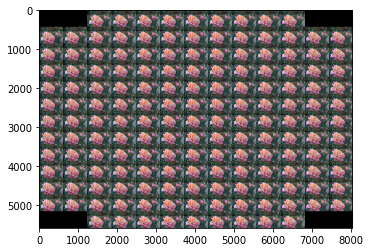

In [4]:


loader = pcam.misc.DataDownloader()
loader.download_data(loader.host_eu_url, fp='./data')
loader.extract_archive(archive_fn='./data/illum_test_data.zip', fname_list='lfr')
lfp_path = './data/gradient_rose_close.lfr'
calibration_path = './data/caldata-B5144402350.tar'
#function call. desired output = decoded_views_all
decoded_views_all = lf_decode_sans_save(lfp_path, calibration_path)
#visualization of results
plt.imshow(decoded_views_all)
plt.show()

Download skipped as illum_test_data.zip already exists

 Debayering
 Progress: Finished 


 Estimate micro image size
 Progress: Finished 


 Compute LoG
 Progress: Finished 


 Select maxima
 Progress: Finished 


 Refine micro image centers
 Progress: Finished 


 Sort micro image centers
 Progress: Finished 


 Grid fitting
 Progress: Finished 


 Save calibration data
 Progress: Finished 


 Hot pixel detection
 Progress: Finished 


 Debayering
 Progress: Finished 


 Light-field alignment
 Progress: Finished 


 Save aligned light-field

 Potential data loss as directory already exists.
 Progress: Finished 


 Viewpoint composition
 Progress: Finished 


 Write viewpoint images
 Progress: Finished 


 Compute depth map
 Progress: Finished 


 Write depth data
 Progress: Finished 



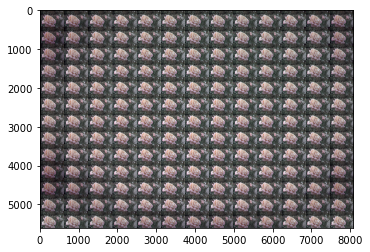

In [2]:

loader = pcam.misc.DataDownloader()
loader.download_data(loader.host_eu_url, fp='./data')
loader.extract_archive(archive_fn='./data/illum_test_data.zip', fname_list='lfr')
lfp_path = './data/gradient_rose_close.lfr'
calibration_path = './data/caldata-B5144402350.tar'
#function call. desired output = decoded_views_all
decoded_views_all = lf_decode_sans_save(lfp_path, calibration_path)
#visualization of results
plt.imshow(decoded_views_all)
plt.show()